In [2]:
import scanpy as sc
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import mmread

In [3]:
dir_path='cellline_out/RNA'
seqs=os.listdir(dir_path)
dir_path='cellline_out/'
for seq in seqs:
    matrix_path=os.path.join(dir_path,"RNA",seq,'matrix')
    print (matrix_path)
    print (os.path.exists(matrix_path))
    #
for seq in seqs:
    matrix_path=os.path.join(dir_path,"ATAC",seq,'matrix')
    print (matrix_path)
    print (os.path.exists(matrix_path))

/hwfssz1/ST_SUPERCELLS/P21Z10200N0090/zhangzhongjin/celline/cellline_ISSAAC_processed/celline_outfile/full_analysis/RNA/scCAT_EU14_NIH3T3/matrix
False
/hwfssz1/ST_SUPERCELLS/P21Z10200N0090/zhangzhongjin/celline/cellline_ISSAAC_processed/celline_outfile/full_analysis/RNA/scCAT_IL9_HEK293T/matrix
False
/hwfssz1/ST_SUPERCELLS/P21Z10200N0090/zhangzhongjin/celline/cellline_ISSAAC_processed/celline_outfile/full_analysis/RNA/ISSAAC_seq_NIH3T3/matrix
True
/hwfssz1/ST_SUPERCELLS/P21Z10200N0090/zhangzhongjin/celline/cellline_ISSAAC_processed/celline_outfile/full_analysis/RNA/scCAT_IL10_HEK293T/matrix
False
/hwfssz1/ST_SUPERCELLS/P21Z10200N0090/zhangzhongjin/celline/cellline_ISSAAC_processed/celline_outfile/full_analysis/RNA/scCAT_EU11_1_HEK293T/matrix
False
/hwfssz1/ST_SUPERCELLS/P21Z10200N0090/zhangzhongjin/celline/cellline_ISSAAC_processed/celline_outfile/full_analysis/RNA/Paired_seq_HEK293T/matrix
True
/hwfssz1/ST_SUPERCELLS/P21Z10200N0090/zhangzhongjin/celline/cellline_ISSAAC_processed/celli

In [25]:
# full_analysis
multiome_3T3_RNA=load_matrix(prefix='cellline_out/RNA/10x_NIH3T3/matrix/')
multiome_3T3_ATAC=load_matrix(prefix='cellline_out/ATAC/10x_NIH3T3/matrix/')
ISSAAC_293T_ATAC=load_matrix(prefix='cellline_out/ATAC/ISSAAC_seq_HEK293T/matrix/')
ISSAAC_3T3_ATAC=load_matrix(prefix='cellline_out/ATAC/ISSAAC_seq_NIH3T3/matrix')
ISSAAC_293T_RNA=load_matrix(prefix='cellline_out/RNA/ISSAAC_seq_HEK293T/matrix/')
ISSAAC_3T3_RNA=load_matrix(prefix='cellline_out/RNA/ISSAAC_seq_NIH3T3/matrix')
paired_seq_293T_ATAC=load_matrix(prefix='cellline_out/ATAC/Paired_seq_HEK293T/matrix/')
paired_seq_293T_RNA=load_matrix(prefix='cellline_out/RNA/Paired_seq_HEK293T/matrix/')
sciCAR_seq_293T_ATAC=load_matrix(prefix='cellline_out/ATAC/sciCAR_seq_HEK293T/matrix/')
sciCAR_seq_3T3T_ATAC=load_matrix(prefix='cellline_out/ATAC/sciCAR_seq_NIH3T3/matrix/')
sciCAR_seq_293T_RNA=load_matrix(prefix='cellline_out/RNA/sciCAR_seq_HEK293T/matrix/')
sciCAR_seq_3T3T_RNA=load_matrix(prefix='cellline_out/RNA/sciCAR_seq_NIH3T3/matrix/')
SHARE_seq_3T3_ATAC=load_matrix(prefix='cellline_out/ATAC/SHARE_seq_NIH3T3/matrix/')
SHARE_seq_3T3_RNA=load_matrix(prefix='cellline_out/RNA/SHARE_seq_NIH3T3/matrix/')
SNARE_seq2_3T3_ATAC=load_matrix(prefix='cellline_out/ATAC/SNARE_seq2_NIH3T3/matrix/')
SNARE_seq2_3T3_RNA=load_matrix(prefix='cellline_out/RNA/SNARE_seq2_NIH3T3/matrix/')
scCAT_seq_IL9_3T3T_RNA=load_matrix(prefix='cellline_out/RNA/scCAT_IL9_NIH3T3/matrix')
scCAT_seq_IL9_3T3T_ATAC=load_matrix(prefix='cellline_out/ATAC/scCAT_IL9_NIH3T3/matrix')
scCAT_seq_IL10_3T3T_RNA=load_matrix(prefix='cellline_out/RNA/scCAT_IL10_NIH3T3/matrix')
scCAT_seq_IL10_3T3T_ATAC=load_matrix(prefix='cellline_out/ATAC/scCAT_IL10_NIH3T3/matrix')

NameError: name 'load_matrix' is not defined

# Correlation across samples of different techniques

### 293T RNA

In [4]:
def load_matrix(prefix=None):
    mtx = mmread(os.path.join(prefix,'matrix.mtx')).T
    mtx = mtx.tocsr()
    var = pd.read_csv(os.path.join(prefix,'genes.tsv'), sep='\t', header=None, index_col=0)
    obs = pd.read_csv(os.path.join(prefix,'barcodes.tsv'), sep='\t', header=None, index_col=0)
    adata = sc.AnnData(X=mtx, var=var, obs=obs)
    return adata

In [5]:
sciCAR_seq=load_matrix(prefix='celline_outfile/50k_downsampled/RNA/sciCAR_seq_HEK293T/matrix/')
ISSAAC_seq=load_matrix(prefix='celline_outfile/50k_downsampled/RNA/ISSAAC_seq_HEK293T/matrix/')
Paired_seq=load_matrix(prefix='celline_outfile/50k_downsampled/RNA/Paired_seq_HEK293T/matrix/')
CAT_IL9_293T_RNA=load_matrix(prefix='celline_outfile/50k_downsampled/RNA/scCAT_IL9_HEK293T/matrix/')
CAT_IL10_293T_RNA=load_matrix(prefix='celline_outfile/50k_downsampled/RNA/scCAT_IL10_HEK293T/matrix/')

In [13]:
adata1=sciCAR_seq
adata2=ISSAAC_seq
adata3=Paired_seq
rna1=CAT_IL9_293T_RNA
rna2=CAT_IL10_293T_RNA
d=[list(adata1.var_names),list(adata2.var_names),list(adata3.var_names)]
print(len(set.intersection(*map(set,d))))
d=[list(rna1.var_names),list(rna2.var_names)]
print(len(set.intersection(*map(set,d))))
d=[list(adata1.var_names),list(adata2.var_names),list(adata3.var_names),list(rna1.var_names),list(rna2.var_names)]
genes=list(set.intersection(*map(set,d)))
print (len(genes))

14446
21067
12743


In [14]:
adata1=adata1[:, genes]
adata2=adata2[:, genes]
adata3=adata3[:, genes]
#
rna1=rna1[:, genes]
rna2=rna2[:, genes]

In [15]:
adata1.obs['tech']='sci-CAR-seq'
adata2.obs['tech']='ISSAAC-seq'
adata3.obs['tech']='paired-seq'
#
rna1.obs['tech']='HT-scCAT-seq(IL9)'
rna2.obs['tech']='HT-scCAT-seq(IL10)'
adata1,adata2,adata3,rna1,rna2

/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/zhangzhongjin/RTEMP/ipykernel_47343/2682925269.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['tech']='sci-CAR-seq'
/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/zhangzhongjin/RTEMP/ipykernel_47343/2682925269.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['tech']='ISSAAC-seq'
/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/zhangzhongjin/RTEMP/ipykernel_47343/2682925269.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata3.obs['tech']='paired-seq'
/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/zhangzhongjin/RTEMP/ipykernel_47343/2682925269.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  rna1.obs['tech']='HT-scCAT-seq(IL9)'
/jdfssz1/ST_SUPERCELLS/P21Z102

(AnnData object with n_obs × n_vars = 812 × 12743
     obs: 'tech',
 AnnData object with n_obs × n_vars = 2571 × 12743
     obs: 'tech',
 AnnData object with n_obs × n_vars = 840 × 12743
     obs: 'tech',
 AnnData object with n_obs × n_vars = 1957 × 12743
     obs: 'tech',
 AnnData object with n_obs × n_vars = 1406 × 12743
     obs: 'tech')

* processing as bulk samples

In [16]:
adata_df1=pd.DataFrame(adata1.X.toarray().sum(axis=0), index=adata1.var_names.values)
adata_df2=pd.DataFrame(adata2.X.toarray().sum(axis=0), index=adata2.var_names.values)
adata_df3=pd.DataFrame(adata3.X.toarray().sum(axis=0), index=adata3.var_names.values)
#
rna_df1=pd.DataFrame(rna1.X.toarray().sum(axis=0), index=rna1.var_names.values)
rna_df2=pd.DataFrame(rna2.X.toarray().sum(axis=0), index=rna2.var_names.values)

In [17]:
counts_df=pd.concat([adata_df1, adata_df2, adata_df3, rna_df1, rna_df2],axis=1)
counts_df.columns=['sci-CAR-seq', 'ISSAAC-seq', 'paired-seq', 'HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)']

In [18]:
counts_df=counts_df.dropna(axis=0)
counts_df=np.log2(counts_df+1)
counts_df.head()

,sci-CAR-seq,ISSAAC-seq,paired-seq,HT-scCAT-seq(IL9),HT-scCAT-seq(IL10)
SLC35G1,6.954196,10.015415,3.169925,7.483816,7.055282
WASF3,8.000000,10.975848,3.807355,6.189825,5.554589
TSPYL1,6.409391,13.632995,2.584963,9.315150,8.906891
ZCCHC24,6.044394,9.438792,2.807355,6.228819,5.459432
TPM4,5.906891,13.137632,4.000000,8.082149,7.882643


In [19]:
col_sums = np.sum(counts_df, axis=0)
normalized_matrix = np.log2(counts_df / col_sums * 1000000 + 1)
normalized_matrix.head()

,sci-CAR-seq,ISSAAC-seq,paired-seq,HT-scCAT-seq(IL9),HT-scCAT-seq(IL10)
SLC35G1,6.529186,6.463707,6.234769,6.472557,6.470864
WASF3,6.729259,6.594386,6.495899,6.202074,6.130228
TSPYL1,6.412816,6.904243,5.944793,6.785164,6.803697
ZCCHC24,6.329249,6.379157,6.062004,6.211011,6.105658
TPM4,6.296468,6.851300,6.566340,6.582319,6.629132


<Figure size 600x400 with 0 Axes>

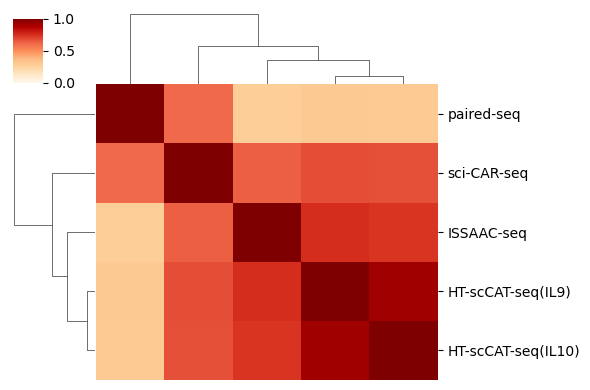

In [21]:
fig=plt.figure()
sns.clustermap(normalized_matrix.corr(),xticklabels=False,yticklabels=True, figsize=(6, 5),cmap='OrRd', 
               dendrogram_ratio=(.2, .2), cbar_pos=(0.03, .78, .05, .16), vmin=0, vmax=1) # cmap='Spectral_r,
fig.set_size_inches(6, 4)
plt.savefig('RNA_correlation_HEK293T.pdf', dpi=600)

### 3T3 RNA

In [22]:
def load_matrix(prefix=None):
    mtx = mmread(os.path.join(prefix,'matrix.mtx')).T
    mtx = mtx.tocsr()
    var = pd.read_csv(os.path.join(prefix,'genes.tsv'), sep='\t', header=None, index_col=0)
    obs = pd.read_csv(os.path.join(prefix,'barcodes.tsv'), sep='\t', header=None, index_col=0)
    adata = sc.AnnData(X=mtx, var=var, obs=obs)
    return adata
def load_matrixT(prefix=None):
    mtx = mmread(os.path.join(prefix,'matrix.mtx'))
    mtx = mtx.tocsr()
    var = pd.read_csv(os.path.join(prefix,'genes.tsv'), sep='\t', header=None, index_col=0)
    obs = pd.read_csv(os.path.join(prefix,'barcodes.tsv'), sep='\t', header=None, index_col=0)
    adata = sc.AnnData(X=mtx, var=var, obs=obs)
    return adata

In [23]:
multitome_3T3_RNA=load_matrixT(prefix='celline_outfile/50k_downsampled/RNA/10x_NIH3T3/matrix')
ISSAAC_3T3_RNA=load_matrixT(prefix='celline_outfile/50k_downsampled/RNA/ISSAAC_seq_NIH3T3/matrix')
sciCAR_seq_3T3T_RNA=load_matrix(prefix='celline_outfile/50k_downsampled/RNA/sciCAR_seq_NIH3T3/matrix')
SHARE_seq_3T3_RNA=load_matrix(prefix='celline_outfile/50k_downsampled/RNA/SHARE_seq_NIH3T3/matrix')
SNARE_seq2_3T3_RNA=load_matrix(prefix='celline_outfile/50k_downsampled/RNA/SNARE_seq2_NIH3T3/matrix')
CAT_seq_IL9_3T3_RNA=load_matrixT(prefix='celline_outfile/50k_downsampled/RNA/scCAT_IL9_NIH3T3/matrix')
CAT_seq_IL10_3T3_RNA=load_matrixT(prefix='celline_outfile/50k_downsampled/RNA/scCAT_IL10_NIH3T3/matrix')

In [120]:
multitome_3T3_RNA=load_matrix(prefix='cellline_out/RNA/10x_NIH3T3/matrix')
ISSAAC_3T3_RNA=load_matrix(prefix='cellline_out/RNA/ISSAAC_seq_NIH3T3/matrix')
sciCAR_seq_3T3T_RNA=load_matrix(prefix='cellline_out/RNA/sciCAR_seq_NIH3T3/matrix')
SHARE_seq_3T3_RNA=load_matrix(prefix='cellline_out/RNA/SHARE_seq_NIH3T3/matrix')
SNARE_seq2_3T3_RNA=load_matrix(prefix='cellline_out/RNA/SNARE_seq2_NIH3T3/matrix')
CAT_seq_IL9_3T3_RNA=load_matrixT(prefix='cellline_out/RNA/scCAT_IL9_NIH3T3/')
CAT_seq_IL10_3T3_RNA=load_matrixT(prefix='cellline_out/RNA/scCAT_IL10_NIH3T3/')

In [24]:
adata1=multitome_3T3_RNA
adata2=ISSAAC_3T3_RNA
adata3=sciCAR_seq_3T3T_RNA
adata4=SHARE_seq_3T3_RNA
adata5=SNARE_seq2_3T3_RNA
rna1=CAT_seq_IL9_3T3_RNA
rna2=CAT_seq_IL10_3T3_RNA

In [25]:
d=[list(adata1.var_names),list(adata2.var_names),list(adata3.var_names),list(adata4.var_names),list(adata5.var_names)]
print(len(set.intersection(*map(set,d))))
d=[list(rna1.var_names),list(rna2.var_names)]
print(len(set.intersection(*map(set,d))))
d=[list(adata1.var_names),list(adata2.var_names),list(adata3.var_names),list(adata4.var_names),list(adata5.var_names),list(rna1.var_names),list(rna2.var_names)]
genes=list(set.intersection(*map(set,d)))
print (len(genes))

15228
16911
12903


In [26]:
adata1=adata1[:, genes]
adata2=adata2[:, genes]
adata3=adata3[:, genes]
adata4=adata4[:, genes]
adata5=adata5[:, genes]
#
rna1=rna1[:, genes]
rna2=rna2[:, genes]

In [27]:
adata1.obs['tech']='10x Multitome'
adata2.obs['tech']='ISSAAC-seq'
adata3.obs['tech']='sci-CAR-seq'
adata4.obs['tech']='SHARE-seq'
adata5.obs['tech']='SNARE-seq2'
#
rna1.obs['tech']='HT-scCAT-seq(IL9)'
rna2.obs['tech']='HT-scCAT-seq(IL10)'
adata1,adata2,adata3,adata4,adata5,rna1,rna2

/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/zhangzhongjin/RTEMP/ipykernel_47343/1681153174.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['tech']='10x Multitome'
/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/zhangzhongjin/RTEMP/ipykernel_47343/1681153174.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata2.obs['tech']='ISSAAC-seq'
/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/zhangzhongjin/RTEMP/ipykernel_47343/1681153174.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata3.obs['tech']='sci-CAR-seq'
/jdfssz1/ST_SUPERCELLS/P21Z10200N0090/Automated/USER/zhangzhongjin/RTEMP/ipykernel_47343/1681153174.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata4.obs['tech']='SHARE-seq'
/jdfssz1/ST_SUPERCELLS/P21Z10200N

(AnnData object with n_obs × n_vars = 7324 × 12903
     obs: 'tech',
 AnnData object with n_obs × n_vars = 3027 × 12903
     obs: 'tech',
 AnnData object with n_obs × n_vars = 868 × 12903
     obs: 'tech',
 AnnData object with n_obs × n_vars = 3072 × 12903
     obs: 'tech',
 AnnData object with n_obs × n_vars = 1333 × 12903
     obs: 'tech',
 AnnData object with n_obs × n_vars = 2071 × 12903
     obs: 'tech',
 AnnData object with n_obs × n_vars = 1775 × 12903
     obs: 'tech')

* processing as bulk samples

In [28]:
adata_df1=pd.DataFrame(adata1.X.toarray().sum(axis=0), index=adata1.var_names.values)
adata_df2=pd.DataFrame(adata2.X.toarray().sum(axis=0), index=adata2.var_names.values)
adata_df3=pd.DataFrame(adata3.X.toarray().sum(axis=0), index=adata3.var_names.values)
adata_df4=pd.DataFrame(adata4.X.toarray().sum(axis=0), index=adata4.var_names.values)
adata_df5=pd.DataFrame(adata5.X.toarray().sum(axis=0), index=adata5.var_names.values)
#
rna_df1=pd.DataFrame(rna1.X.toarray().sum(axis=0), index=rna1.var_names.values)
rna_df2=pd.DataFrame(rna2.X.toarray().sum(axis=0), index=rna2.var_names.values)

In [29]:
counts_df=pd.concat([adata_df1, adata_df2, adata_df3, adata_df4, adata_df5, rna_df1, rna_df2],axis=1)
counts_df.columns=['10x_Multitome', 'ISSAAC-seq', 'sci-CAR-seq', 'SHARE-seq', 'SNARE-seq2', 'HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)']

In [30]:
counts_df

,10x_Multitome,ISSAAC-seq,sci-CAR-seq,SHARE-seq,SNARE-seq2,HT-scCAT-seq(IL9),HT-scCAT-seq(IL10)
Coq4,942,432,10,25,80,57,51
Dqx1,712,75,11,22,47,399,421
Tpm3-rs7,402,572,1,42,1775,168,104
Esrra,946,430,75,71,148,157,110
Orc6,3681,1706,139,307,924,441,405
...,...,...,...,...,...,...,...
H2afj,16059,668,35,97,719,943,831
Usf2,3006,2648,139,148,306,159,162
Tnfrsf25,56,6,6,1,41,4,6
Slc2a1,6383,1281,456,438,1015,2463,2081


In [31]:
counts_df=counts_df.dropna(axis=0)
counts_df=np.log2(counts_df+1)
counts_df.head()

,10x_Multitome,ISSAAC-seq,sci-CAR-seq,SHARE-seq,SNARE-seq2,HT-scCAT-seq(IL9),HT-scCAT-seq(IL10)
Coq4,9.881114,8.758223,3.459432,4.700440,6.339850,5.857981,5.700440
Dqx1,9.477758,6.247928,3.584963,4.523562,5.584963,8.643856,8.721099
Tpm3-rs7,8.654636,9.162391,1.000000,5.426265,10.794416,7.400879,6.714246
Esrra,9.887221,8.751544,6.247928,6.169925,7.219169,7.303781,6.794416
Orc6,11.846274,10.737247,7.129283,8.266787,9.853310,8.787903,8.665336


In [32]:
col_sums = np.sum(counts_df, axis=0)
normalized_matrix = np.log2(counts_df / col_sums * 1000000 + 1)
normalized_matrix.head()

,10x_Multitome,ISSAAC-seq,sci-CAR-seq,SHARE-seq,SNARE-seq2,HT-scCAT-seq(IL9),HT-scCAT-seq(IL10)
Coq4,6.306863,6.282344,5.546861,5.772642,5.987524,6.080747,6.091644
Dqx1,6.247511,5.802512,5.597203,5.718337,5.807693,6.635132,6.697735
Tpm3-rs7,6.118243,6.346613,3.830296,5.976271,6.745874,6.413590,6.324598
Esrra,6.307743,6.281258,6.385864,6.158800,6.172135,6.394761,6.341510
Orc6,6.565525,6.572838,6.574109,6.575743,6.615553,6.658738,6.688570


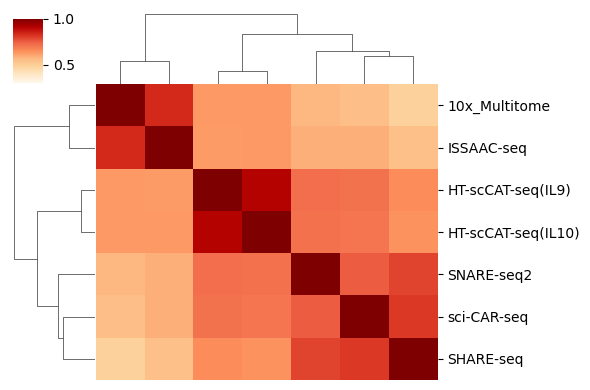

In [33]:
sns.clustermap(normalized_matrix.corr(),xticklabels=False,yticklabels=True, figsize=(6, 5),cmap='OrRd', 
               dendrogram_ratio=(.2, .2), cbar_pos=(0.03, .78, .05, .16), vmin=0.3, vmax=1)
fig.set_size_inches(6, 4)
plt.savefig('RNA_correlation_NIH3T3.pdf', dpi=600)

# Correlation between replicate samples

In [34]:
import scanpy as sc
import numpy as np
import os
from scipy.io import mmread
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from collections import Counter
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

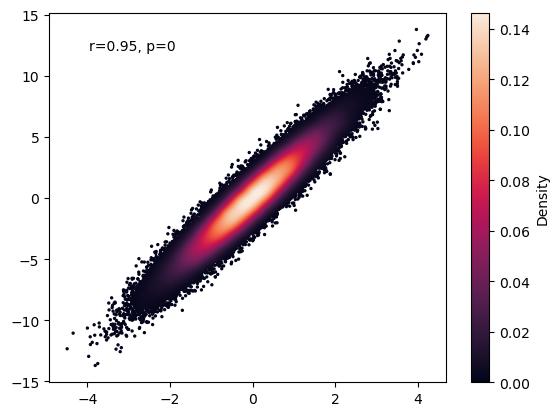

In [77]:
def density_scatter( x , y, ax = None, sort = True, bins = 20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    global fig
    if ax is None :
        fig , ax = plt.subplots()
    data , x_e, y_e = np.histogram2d( x, y, bins =bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    # Sort the points by density, so that the densest points are plotted last
    if sort :
        idx = z.argsort()
        x, y, z = x[idx], y[idx], z[idx]

    ax.scatter( x, y, c=z, s=2,cmap='rocket', **kwargs )

    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap='rocket'), ax=ax)
    cbar.ax.set_ylabel('Density')

    # annotate with PCC and P-value
    r, p = stats.pearsonr(x, y)
    ax.text(.1, .9, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
    return ax

if "__main__" == __name__ :

    x = np.random.normal(size=100000)
    y = x * 3 + np.random.normal(size=100000)
    density_scatter(x, y, bins = [30,30] )

In [92]:
def load_matrix(prefix=None):
    mtx = mmread(os.path.join(prefix,'matrix.mtx'))
    mtx = mtx.tocsr()
    var = pd.read_csv(os.path.join(prefix,'genes.tsv'), sep='\t', header=None, index_col=0)
    obs = pd.read_csv(os.path.join(prefix,'barcodes.tsv'), sep='\t', header=None, index_col=0)
    adata = sc.AnnData(X=mtx, var=var, obs=obs)
    return adata
CAT_IL9_3T3_RNA=load_matrix(prefix='cellline_out/RNA/scCAT_IL9_NIH3T3')
CAT_IL9_293T_RNA=load_matrix(prefix='cellline_out/RNA/scCAT_IL9_HEK293T')
CAT_IL10_3T3_RNA=load_matrix(prefix='cellline_out/RNA/scCAT_IL10_NIH3T3')
CAT_IL10_293T_RNA=load_matrix(prefix='cellline_out/RNA/scCAT_IL10_HEK293T')
# genescore
CAT_3T3_ATAC=load_matrix(prefix='ArchR-NIH3T3/ArchROutput/GeneScore')
CAT_293T_ATAC=load_matrix(prefix='ArchR-HEK293T/ArchROutput/GeneScore')

In [93]:
CAT_3T3_ATAC.obs['sample']=[i.split('#')[0] for i in CAT_3T3_ATAC.obs_names.values]
CAT_293T_ATAC.obs['sample']=[i.split('#')[0] for i in CAT_293T_ATAC.obs_names.values]
CAT_IL9_3T3_ATAC=CAT_3T3_ATAC[CAT_3T3_ATAC.obs['sample']=='IL9']
CAT_IL10_3T3_ATAC=CAT_3T3_ATAC[CAT_3T3_ATAC.obs['sample']=='IL10']
CAT_IL9_293T_ATAC=CAT_293T_ATAC[CAT_293T_ATAC.obs['sample']=='IL9']
CAT_IL10_293T_ATAC=CAT_293T_ATAC[CAT_293T_ATAC.obs['sample']=='IL10']

In [94]:
IL9_3T3_RNA = pd.DataFrame(CAT_IL9_3T3_RNA.X.toarray().sum(axis=0), index=CAT_IL9_3T3_RNA.var_names.values)
IL10_3T3_RNA = pd.DataFrame(CAT_IL10_3T3_RNA.X.toarray().sum(axis=0), index=CAT_IL10_3T3_RNA.var_names.values)
IL9_293T_RNA = pd.DataFrame(CAT_IL9_293T_RNA.X.toarray().sum(axis=0), index=CAT_IL9_293T_RNA.var_names.values)
IL10_293T_RNA = pd.DataFrame(CAT_IL10_293T_RNA.X.toarray().sum(axis=0), index=CAT_IL10_293T_RNA.var_names.values)
#
IL9_3T3_ATAC = pd.DataFrame(CAT_IL9_3T3_ATAC.X.toarray().sum(axis=0), index=CAT_IL9_3T3_ATAC.var_names.values) 
IL10_3T3_ATAC = pd.DataFrame(CAT_IL10_3T3_ATAC.X.toarray().sum(axis=0), index=CAT_IL10_3T3_ATAC.var_names.values)
IL9_293T_ATAC = pd.DataFrame(CAT_IL9_293T_ATAC.X.toarray().sum(axis=0), index=CAT_IL9_293T_ATAC.var_names.values)
IL10_293T_ATAC = pd.DataFrame(CAT_IL10_293T_ATAC.X.toarray().sum(axis=0), index=CAT_IL10_293T_ATAC.var_names.values)

In [95]:
# RNA 3T3
counts_RNA_3T3=pd.concat([IL9_3T3_RNA, IL10_3T3_RNA],axis=1)
counts_RNA_3T3.columns=['IL9', 'IL10']
counts_RNA_3T3=counts_RNA_3T3.dropna(axis=0)
counts_RNA_3T3=np.log2(counts_RNA_3T3+1)
counts_RNA_3T3.head()
# RNA 293T
counts_RNA_293T=pd.concat([IL9_293T_RNA, IL10_293T_RNA],axis=1)
counts_RNA_293T.columns=['IL9', 'IL10']
counts_RNA_293T=counts_RNA_293T.dropna(axis=0)
counts_RNA_293T=np.log2(counts_RNA_293T+1)
counts_RNA_293T.head()
# ATAC 3T3
counts_ATAC_3T3=pd.concat([IL9_3T3_ATAC, IL10_3T3_ATAC],axis=1)
counts_ATAC_3T3.columns=['IL9', 'IL10']
counts_ATAC_3T3=counts_ATAC_3T3.dropna(axis=0)
counts_ATAC_3T3=np.log2(counts_ATAC_3T3+1)
counts_ATAC_3T3.head()
# ATAC 293T
counts_ATAC_293T=pd.concat([IL9_293T_ATAC, IL10_293T_ATAC],axis=1)
counts_ATAC_293T.columns=['IL9', 'IL10']
counts_ATAC_293T=counts_ATAC_293T.dropna(axis=0)
counts_ATAC_293T=np.log2(counts_ATAC_293T+1)
counts_ATAC_293T.head()

,IL9,IL10
OR4F5,0.000000,0.000000
LOC729737,0.000000,0.000000
LOC101928626,0.000000,0.000000
FAM87B,4.419134,4.996976
LINC01128,7.523515,7.361461


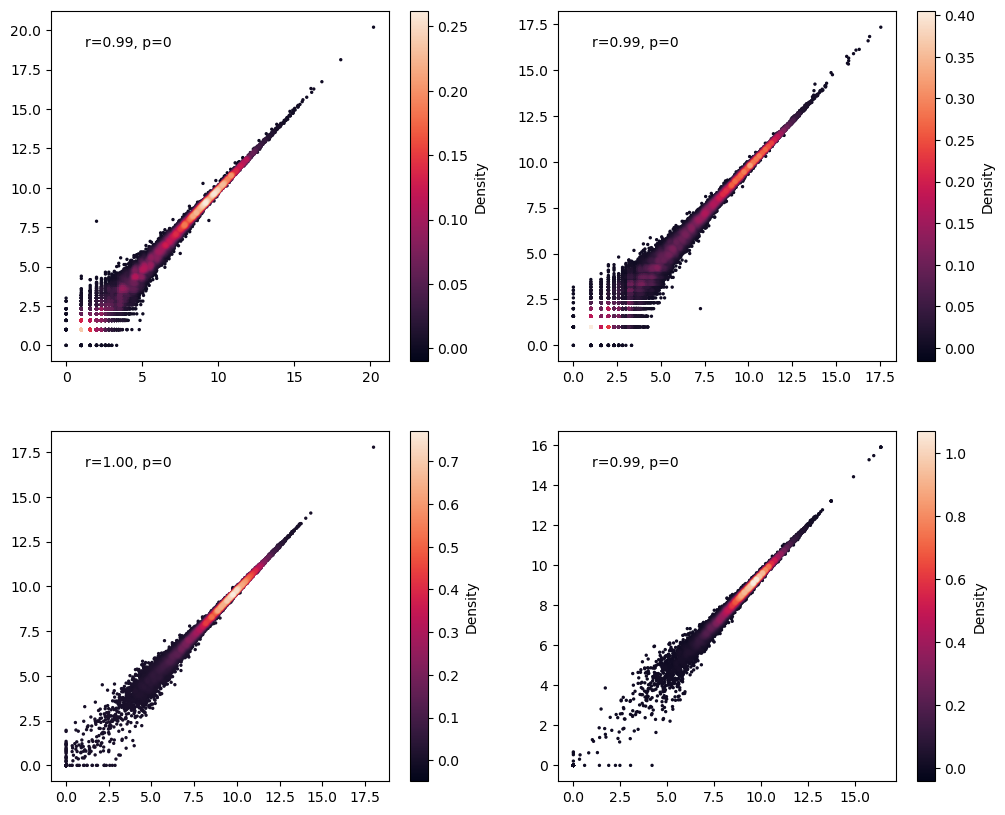

In [97]:
fig, axis = plt.subplots(2, 2, figsize=(12,10))
axis[0][0]=density_scatter(counts_RNA_3T3['IL9'], counts_RNA_3T3['IL10'], ax= axis[0][0], bins = [100, 100] )
axis[0][1]=density_scatter(counts_RNA_293T['IL9'], counts_RNA_293T['IL10'],ax= axis[0][1], bins = [100, 100] )
axis[1][0]=density_scatter(counts_ATAC_3T3['IL9'], counts_ATAC_3T3['IL10'],ax= axis[1][0], bins = [100, 100] )
axis[1][1]=density_scatter(counts_ATAC_293T['IL9'], counts_ATAC_293T['IL10'],ax= axis[1][1], bins = [100, 100] )
plt.savefig('correlation_comparison_samples.pdf')

# comparison between techs

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from collections import Counter
import matplotlib.pyplot as plt

kelly = ['#af2337', '#ecc342', '#2967a0', '#2f3c28', '#96b437',
         '#da93ab', '#e58932', '#80598f', '#7e331f', '#3b855a',
         '#c0b286', '#a9c9ed', '#ec977f', '#848482', '#604628',
         '#d26034', '#a64c6b', '#dbd245', '#eba83b', '#5d5092',
         '#222222', '#f2f3f4']

mpl.rcParams['axes.prop_cycle'] = plt.cycler(color=kelly)
mpl.rcParams['axes.titlesize'] = 19
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['legend.markerscale'] = 2
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['figure.dpi'] = 100

sns.set_style('ticks')

'HT-scCAT-seq' = '#af2337'
'ISSAAC-seq' = '#ecc342'
'Paired-seq' = '#2967a0'
'sci-CAR-seq' = '#e58932'
'SHARE-seq' = '#2f3c28'
'SNARE_seq2' = '#96b437'
'10x Multiome' = '#da93ab'

In [13]:
import os
os.chdir('cellline_out/')
metrics_location = [
    ['ISSAAC-seq'          , 'HEK293T', 'ATAC', './ATAC/ISSAAC_seq_HEK293T/metrics.csv'],
    ['ISSAAC-seq'          , 'HEK293T', 'RNA' , './RNA/ISSAAC_seq_HEK293T/metrics.csv'],
    ['Paired-seq'          , 'HEK293T', 'ATAC', './ATAC/Paired_seq_HEK293T/metrics.csv'],
    ['Paired-seq'          , 'HEK293T', 'RNA' , './RNA/Paired_seq_HEK293T/metrics.csv'],
    ['sci-CAR-seq'         , 'HEK293T', 'ATAC', './ATAC/sciCAR_seq_HEK293T/metrics.csv'],
    ['sci-CAR-seq'         , 'HEK293T', 'RNA' , './RNA/sciCAR_seq_HEK293T/metrics.csv'],
    ['ISSAAC-seq'          , 'NIH3T3' , 'ATAC', './ATAC/ISSAAC_seq_NIH3T3/metrics.csv'],
    ['ISSAAC-seq'          , 'NIH3T3' , 'RNA' , './RNA/ISSAAC_seq_NIH3T3/metrics.csv'],
    ['10x Multiome'        , 'NIH3T3' , 'ATAC', './ATAC/10x_NIH3T3/metrics.csv'],
    ['10x Multiome'        , 'NIH3T3' , 'RNA' , './RNA/10x_NIH3T3/metrics.csv'],
    ['SHARE-seq'           , 'NIH3T3' , 'ATAC', './ATAC/SHARE_seq_NIH3T3/metrics.csv'],
    ['SHARE-seq'           , 'NIH3T3' , 'RNA' , './RNA/SHARE_seq_NIH3T3/metrics.csv'],
    ['SNARE-seq2'          , 'NIH3T3' , 'ATAC', './ATAC/SNARE_seq2_NIH3T3/metrics.csv'],
    ['SNARE-seq2'          , 'NIH3T3' , 'RNA' , './RNA/SNARE_seq2_NIH3T3/metrics.csv'],
    ['sci-CAR-seq'         , 'NIH3T3' , 'ATAC', './ATAC/sciCAR_seq_NIH3T3/metrics.csv'],
    ['sci-CAR-seq'         , 'NIH3T3' , 'RNA' , './RNA/sciCAR_seq_NIH3T3/metrics.csv'],
    
    ['HT-scCAT-seq(IL9)'   , 'HEK293T', 'ATAC', './ATAC/scCAT_IL9_HEK293T/metrics.csv'],
    ['HT-scCAT-seq(IL9)'   , 'NIH3T3' , 'ATAC', './ATAC/scCAT_IL9_NIH3T3/metrics.csv'],
    ['HT-scCAT-seq(IL9)'   , 'HEK293T', 'RNA' , './RNA/scCAT_IL9_HEK293T/metrics.csv'],
    ['HT-scCAT-seq(IL9)'   , 'NIH3T3',  'RNA' , './RNA/scCAT_IL9_NIH3T3/metrics.csv'],
    ['HT-scCAT-seq(IL10)'  , 'HEK293T', 'ATAC', './ATAC/scCAT_IL10_HEK293T/metrics.csv'],
    ['HT-scCAT-seq(IL10)'  , 'NIH3T3' , 'ATAC', './ATAC/scCAT_IL10_NIH3T3/metrics.csv'],
    ['HT-scCAT-seq(IL10)'  , 'HEK293T', 'RNA' , './RNA/scCAT_IL10_HEK293T/metrics.csv'],
    ['HT-scCAT-seq(IL10)'  , 'NIH3T3',  'RNA' , './RNA/scCAT_IL10_NIH3T3/metrics.csv']
]
      

In [14]:
dfs = []

for t, c, m, q in metrics_location:
    tmp = pd.read_csv(q)
    tmp.columns=['cell','nCounts','nFeatures']
    tmp['Method'] = t
    tmp['Cell_line'] = c
    tmp['Modality'] = m
    dfs.append(tmp)

cell_lines = pd.concat(dfs, ignore_index = True)
cell_lines.head()

,cell,nCounts,nFeatures,Method,Cell_line,Modality
0,AAACAAACAGCTAGAA,24584,9899,ISSAAC-seq,HEK293T,ATAC
1,AAACAAACCGGAGAGA,2377,1185,ISSAAC-seq,HEK293T,ATAC
2,AAACCGAGAGCTAGAA,5806,2773,ISSAAC-seq,HEK293T,ATAC
3,AAACCGAGCGGAGAGA,6066,2882,ISSAAC-seq,HEK293T,ATAC
4,AAACCTCACGGAGAGA,44964,14369,ISSAAC-seq,HEK293T,ATAC


In [15]:
cell_lines=cell_lines.set_index('cell')

In [16]:
cell_lines.shape

(40785, 5)

In [17]:
cell_lines.groupby(['Cell_line', 'Method', 'Modality']).median()

nCounts  nFeatures
Cell_line Method             Modality                    
HEK293T   HT-scCAT-seq(IL10) ATAC      11396.5     3680.0
                             RNA        7850.5     3816.0
          HT-scCAT-seq(IL9)  ATAC      11556.0     3367.0
                             RNA        7100.0     3679.0
          ISSAAC-seq         ATAC      24702.5     9551.5
                             RNA        8430.5     3522.5
          Paired-seq         ATAC        417.0      279.5
                             RNA         290.5      224.0
          sci-CAR-seq        ATAC        252.5      116.0
                             RNA        2577.5     1493.0
NIH3T3    10x Multiome       ATAC      42661.5    15943.0
                             RNA       12629.0     3522.0
          HT-scCAT-seq(IL10) ATAC      25487.0     7469.0
                             RNA        6176.0     2831.0
          HT-scCAT-seq(IL9)  ATAC      25722.5     6964.5
                             RNA        6133.0     2868.0
          ISSAAC-seq         ATAC      24702.5     9551.5
                             RNA       18377.0     4250.0
          SHARE-seq          ATAC          4.0        2.0
                             RNA        1306.5      989.5
          SNARE-seq2         ATAC       2620.0     1555.0
                             RNA        9248.0     3856.0
          sci-CAR-seq        ATAC          4.0        2.0
                             RNA        2727.5     1218.5

In [54]:
cell_lines['logC'] = np.log10(cell_lines['nCounts'] + 1)
cell_lines['logF'] = np.log10(cell_lines['nFeatures'] + 1)

In [55]:
cell_lines.to_csv(r'celline_outfile/cellline_downsampled.csv')

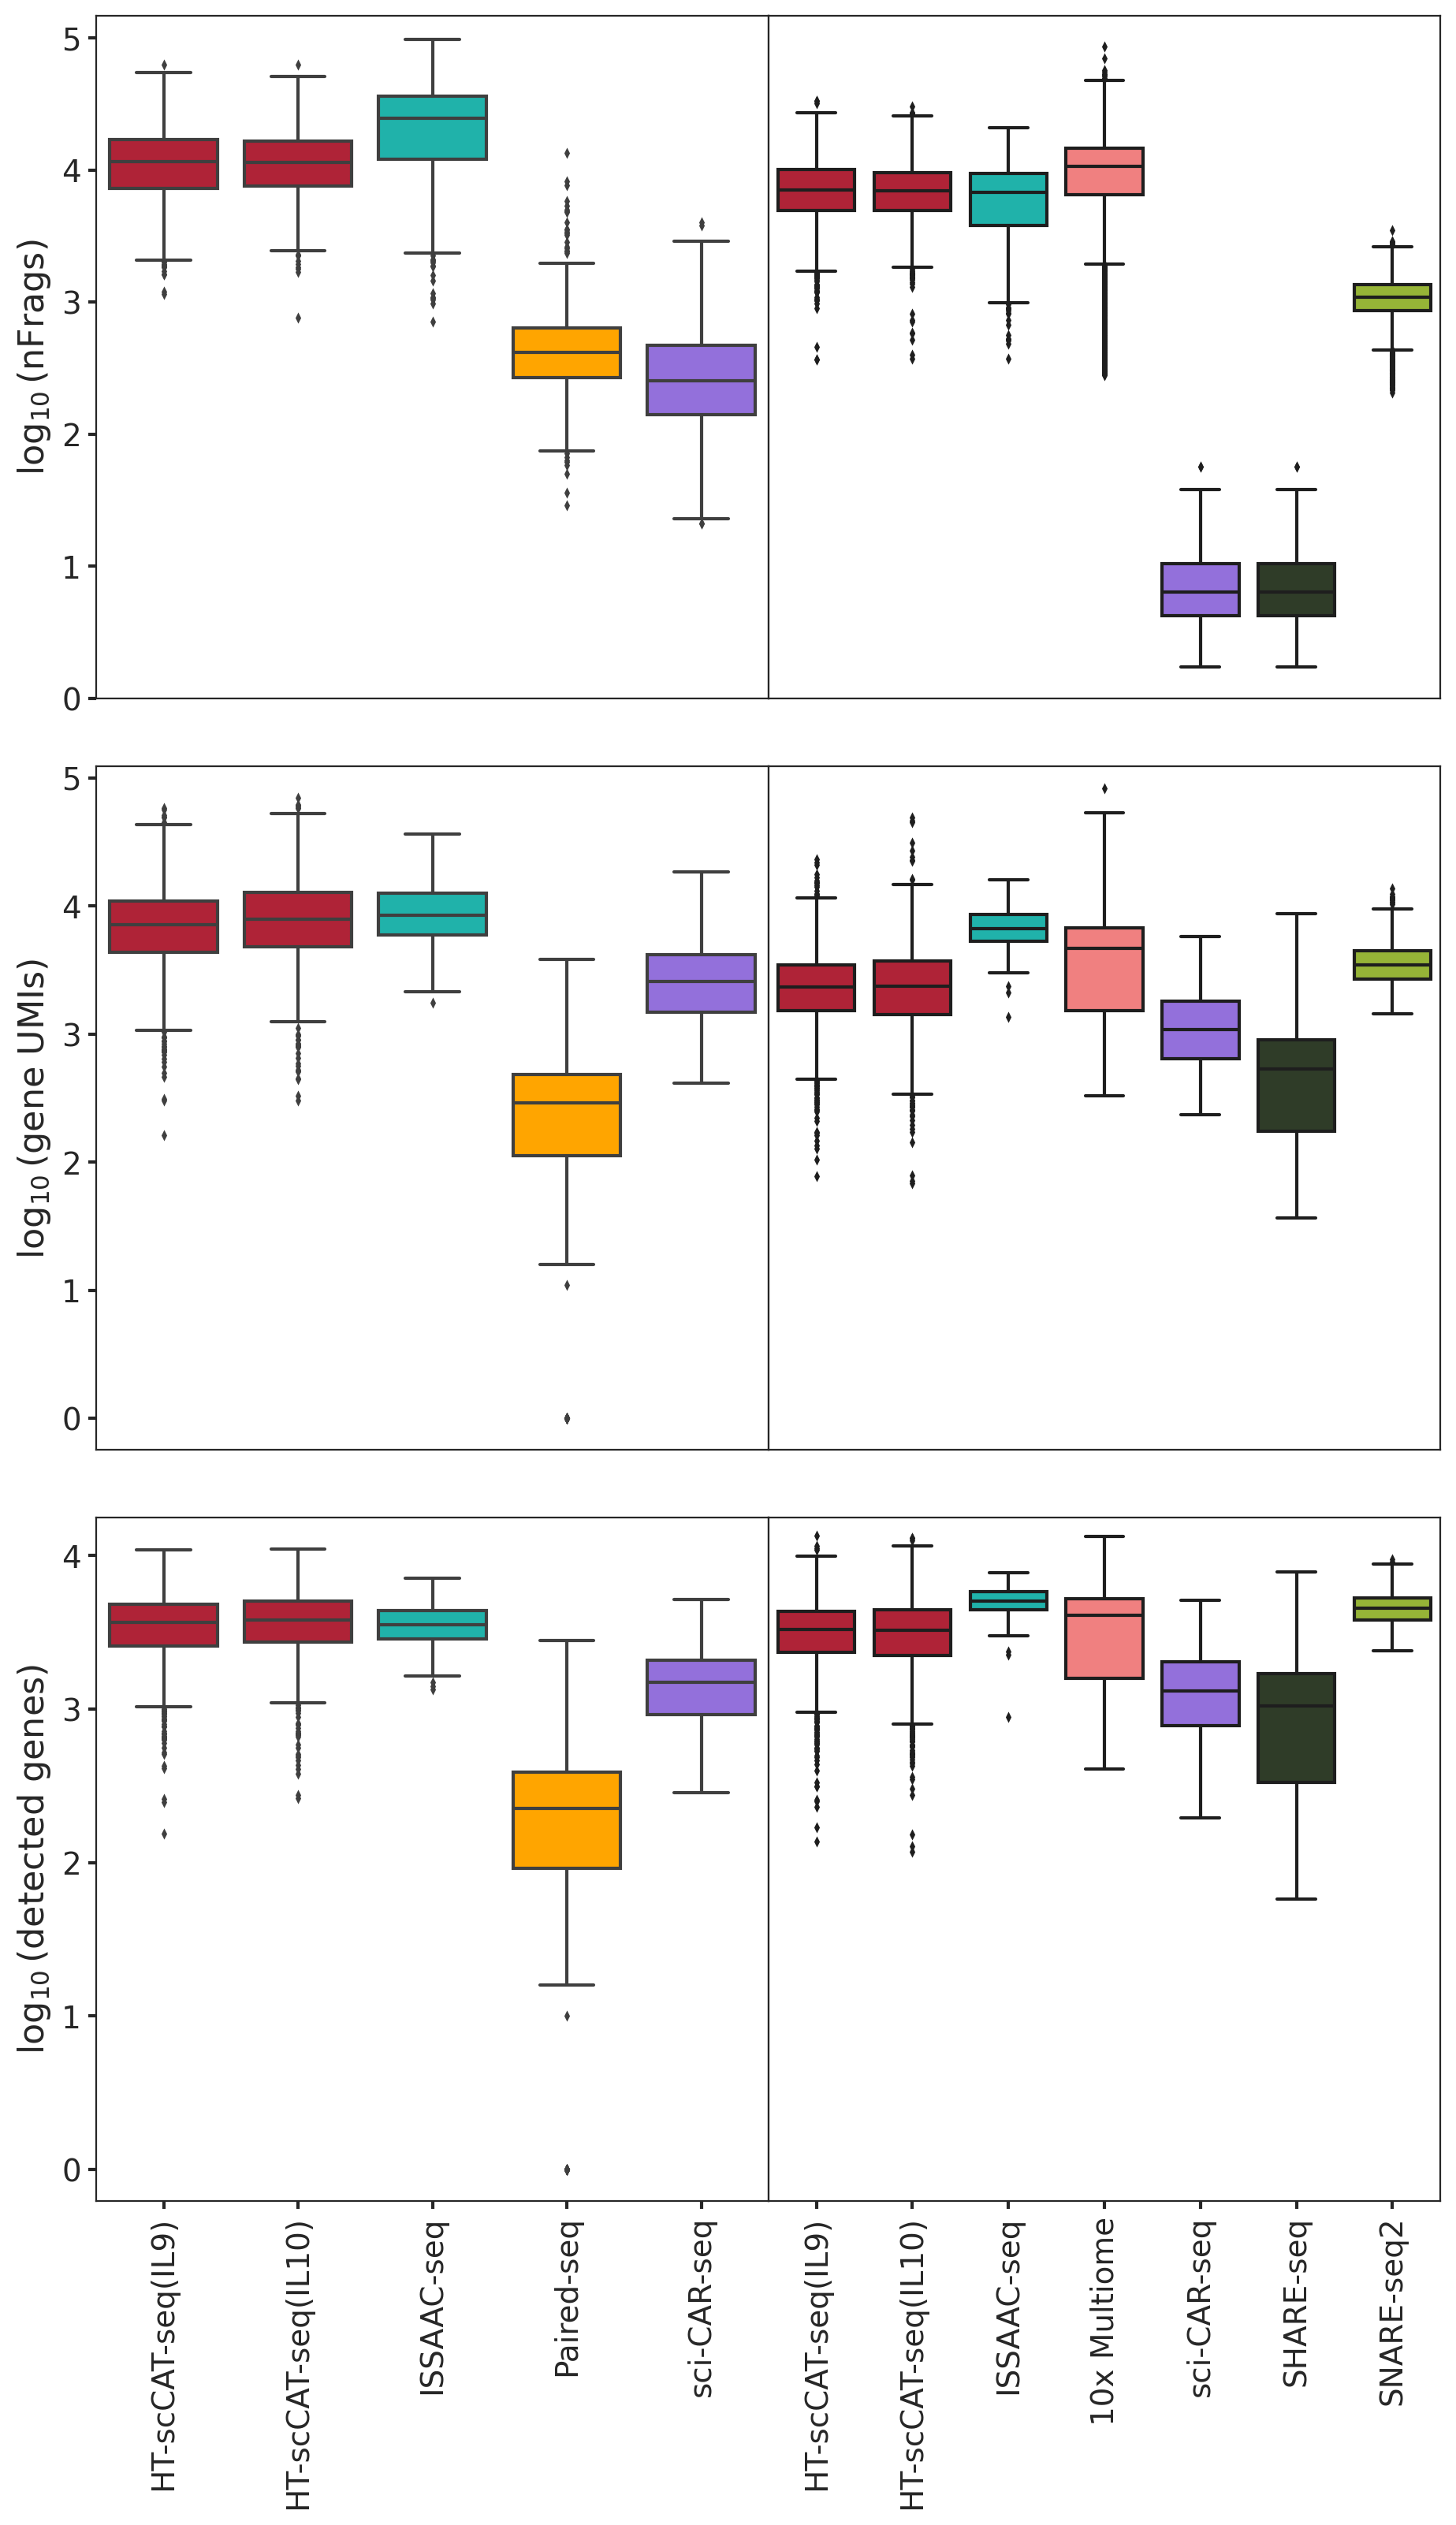

In [10]:
plt.rcParams['figure.figsize'] = (11, 18)
fig, ax = plt.subplots(3,2)
# ATAC frag
plt.subplot(3,2,1) # HEK293T
sns.boxplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "HEK293T"'), 
               x='Method', y='logC', ax=ax[0,0], width=0.8, saturation=1,fliersize=2,
               palette=sns.color_palette(['#af2337', '#af2337', '#20B2AA', '#FFA500', '#9370DB']),
               order=['HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)', 'ISSAAC-seq', 'Paired-seq', 'sci-CAR-seq'])
plt.xticks([])
plt.xlabel('')
plt.yticks([0,1,2,3,4,5])
plt.ylabel(r'$\log_{10}$(nFrags)')
plt.subplot(3,2,2) # NIH3T3
sns.boxplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "NIH3T3"'), 
               x='Method', y='logC', ax=ax[0,1], width=0.8, saturation=1,fliersize=2,
               palette=sns.color_palette(['#af2337', '#af2337', '#20B2AA','#F08080', '#9370DB', '#2f3c28', '#96b437']),
               order=['HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)', 'ISSAAC-seq', '10x Multiome', 'sci-CAR-seq', 'SHARE-seq', 'SNARE-seq2'])
plt.xticks([])
plt.xlabel('')
plt.yticks([0,1,2,3,4,5])
plt.yticks([])
plt.xticks(rotation = 90)
plt.ylabel('')
plt.subplots_adjust(wspace=0, hspace=0.1)
# RNA UMI
plt.subplot(3,2,3) # HEK293T
sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "HEK293T"'), 
               x='Method', y='logC', ax=ax[1,0], width=0.8, saturation=1, fliersize=2,
               palette=sns.color_palette(['#af2337', '#af2337', '#20B2AA', '#FFA500', '#9370DB']),
               order=['HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)', 'ISSAAC-seq', 'Paired-seq', 'sci-CAR-seq'])
plt.xticks([])
plt.xlabel('')
plt.yticks([0,1,2,3,4,5])
plt.ylabel(r'$\log_{10}$(gene UMIs)')
plt.subplot(3,2,4) # NIH3T3
sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "NIH3T3"'), 
               x='Method', y='logC', ax=ax[1,1], width=0.8, saturation=1,fliersize=2,
               palette=sns.color_palette(['#af2337', '#af2337', '#20B2AA','#F08080', '#9370DB', '#2f3c28', '#96b437']),
               order=['HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)', 'ISSAAC-seq', '10x Multiome', 'sci-CAR-seq', 'SHARE-seq', 'SNARE-seq2'])
plt.xticks([])
plt.xlabel('')
plt.yticks([0,1,2,3,4,5])
plt.yticks([])
plt.xticks(rotation = 90)
plt.ylabel('')
plt.subplots_adjust(wspace=0, hspace=0.1)
# RNA gene
plt.subplot(3,2,5) # HEK293T
sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "HEK293T"'), 
               x='Method', y='logF', ax=ax[2,0], width=0.8, saturation=1, fliersize=2,
               palette=sns.color_palette(['#af2337', '#af2337', '#20B2AA', '#FFA500', '#9370DB']),
               order=['HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)', 'ISSAAC-seq', 'Paired-seq', 'sci-CAR-seq'])
plt.xlabel('')
plt.xticks(rotation = 90)
plt.yticks([0,1,2,3,4])
plt.ylabel(r'$\log_{10}$(detected genes)')
plt.subplot(3,2,6) # NIH3T3
sns.boxplot(data = cell_lines.query('Modality == "RNA" & Cell_line == "NIH3T3"'), 
               x='Method', y='logF', ax=ax[2,1], width=0.8, saturation=1, fliersize=2,
               palette=sns.color_palette(['#af2337', '#af2337', '#20B2AA','#F08080', '#9370DB', '#2f3c28', '#96b437']),
               order=['HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)', 'ISSAAC-seq', '10x Multiome', 'sci-CAR-seq', 'SHARE-seq', 'SNARE-seq2'])
plt.xlabel('')
plt.yticks([0,1,2,3,4])
plt.yticks([])
plt.xticks(rotation = 90)
plt.ylabel('')
plt.subplots_adjust(wspace=0, hspace=0.1)
plt.savefig('cellline.pdf', 
            bbox_inches='tight', transparent=True)

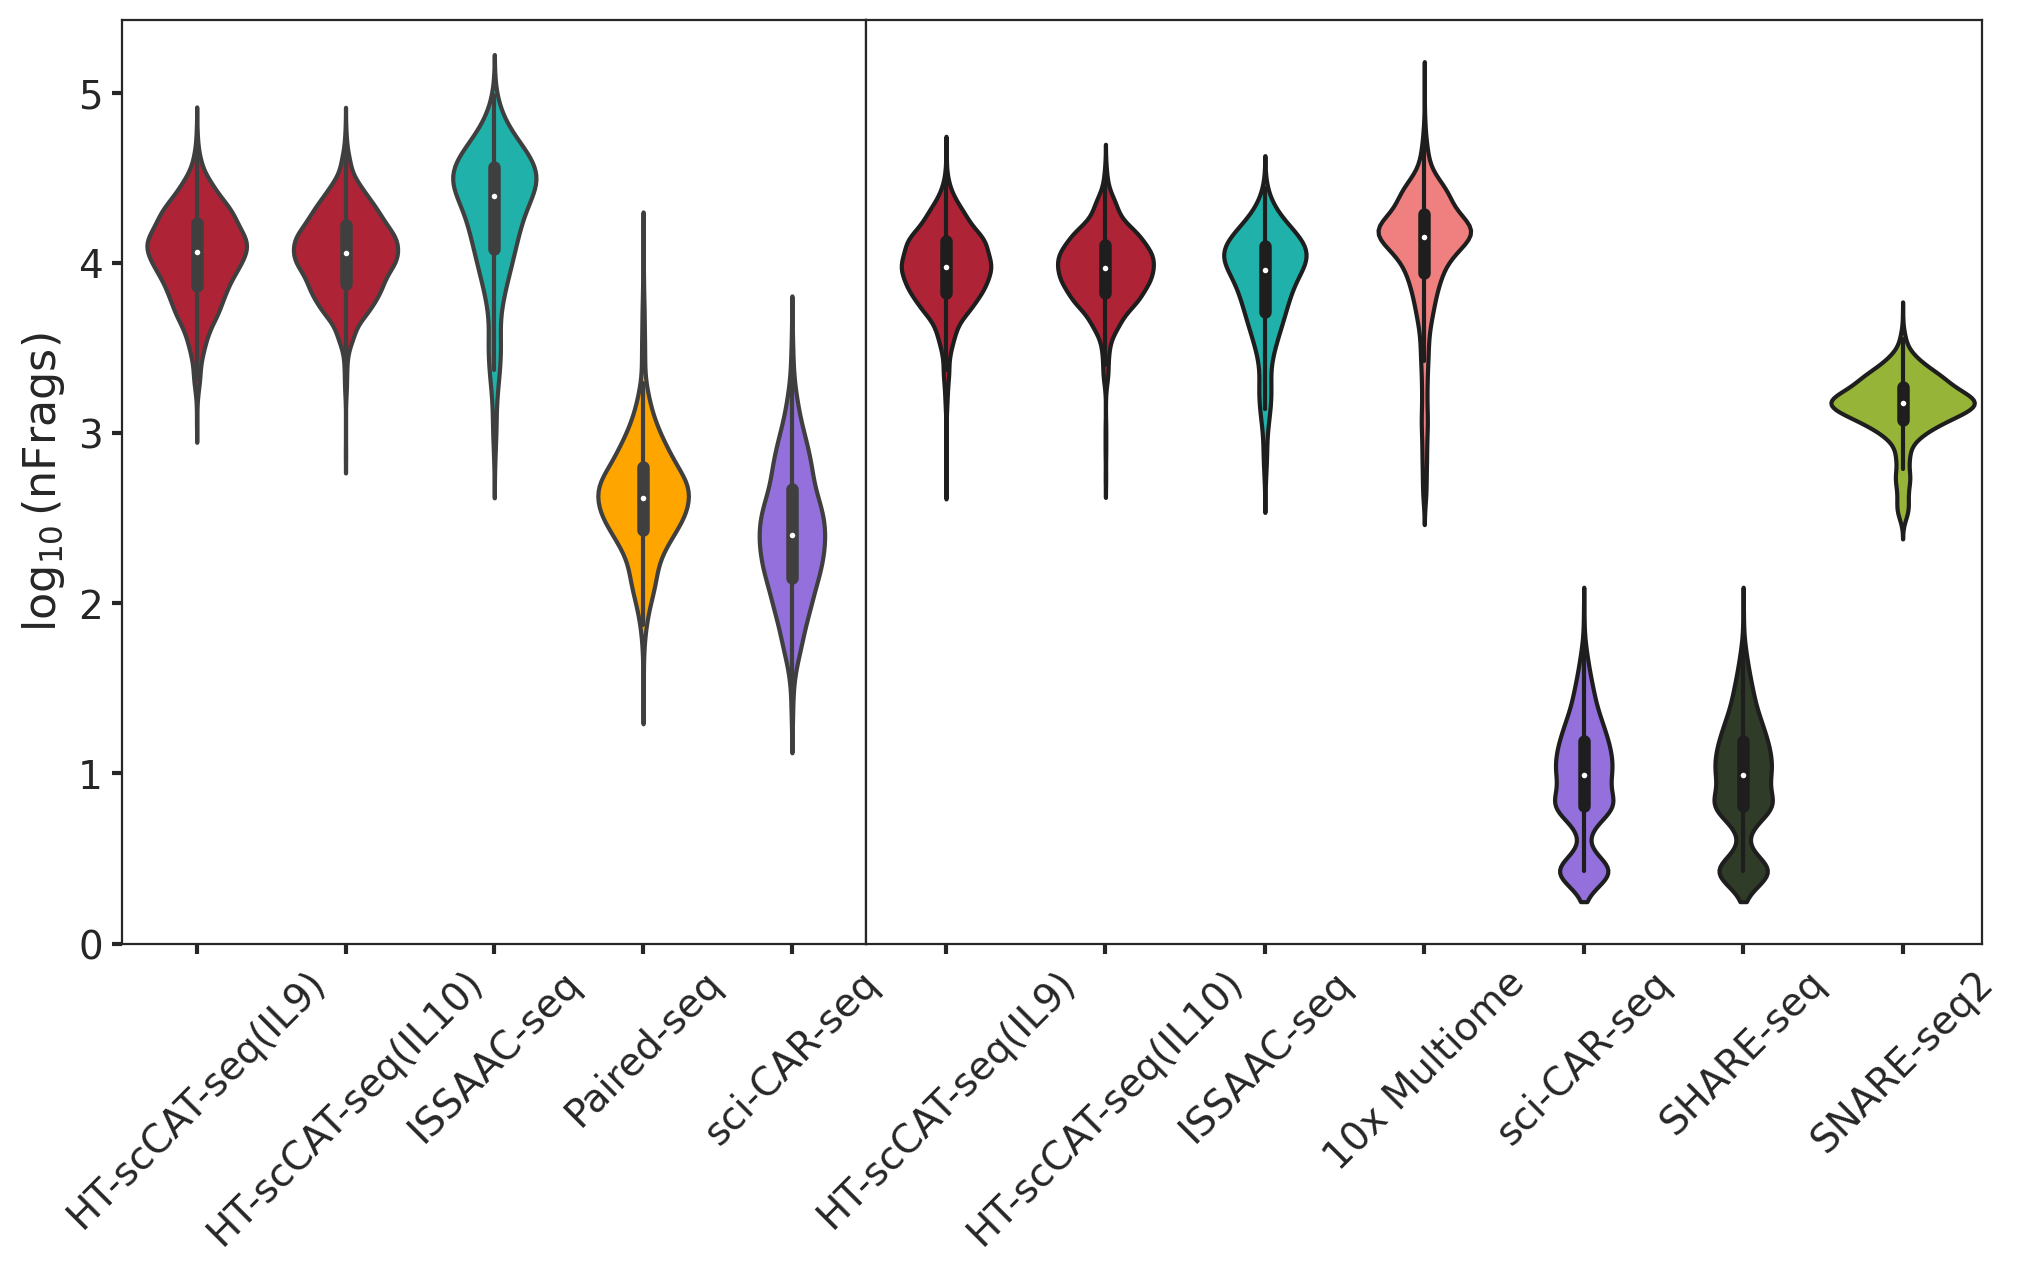

In [43]:
plt.rcParams['figure.figsize'] = (12, 6)
fig, ax = plt.subplots(ncols=2, nrows=1, gridspec_kw={'width_ratios' : [1, 1.5]})

# ATAC frag
plt.subplot(1,2,1) # HEK293T
sns.violinplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "HEK293T"'), 
               x='Method', y='logC', ax=ax[0], width=0.7, saturation=1,fliersize=2,
               palette=sns.color_palette(['#af2337', '#af2337', '#20B2AA', '#FFA500', '#9370DB']),
               order=['HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)', 'ISSAAC-seq', 'Paired-seq', 'sci-CAR-seq'])
plt.xlabel('')
plt.xticks(rotation = 90)
plt.yticks([0,1,2,3,4,5])
plt.ylabel(r'$\log_{10}$(nFrags)')

plt.subplot(1,2,2) # NIH3T3
sns.violinplot(data = cell_lines.query('Modality == "ATAC" & Cell_line == "NIH3T3"'), 
               x='Method', y='logC', ax=ax[1], width=0.9, saturation=1,fliersize=2,
               palette=sns.color_palette(['#af2337', '#af2337', '#20B2AA','#F08080', '#9370DB', '#2f3c28', '#96b437']),
               order=['HT-scCAT-seq(IL9)', 'HT-scCAT-seq(IL10)', 'ISSAAC-seq', '10x Multiome', 'sci-CAR-seq', 'SHARE-seq', 'SNARE-seq2'])
plt.xlabel('')
plt.yticks([0,1,2,3,4,5])
plt.yticks([])
plt.xticks(rotation = 90)
plt.ylabel('')
plt.subplots_adjust(wspace=0, hspace=0.1)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设rna@meta.data是一个pandas DataFrame，包含两列数据：batch和UMI
# 这里我们创建一个示例DataFrame
data = {'batch': ['A', 'A', 'B', 'B'], 'UMI': [10, 20, 30, 40]}
df = pd.DataFrame(data)

# 使用seaborn绘制小提琴图和箱线图
plt.figure(figsize=(12, 5))
sns.violinplot(x='batch', y='UMI', data=df, inner=None, color='white')
sns.boxplot(x='batch', y='UMI', data=df, width=0.1, color='black', boxprops=dict(alpha=1), fliersize=0)

# 添加中位数标签
for i in range(len(df['batch'].unique())):
    median_value = df[df['batch'] == df['batch'].unique()[i]]['UMI'].median()
    plt.text(i, median_value * 2.6, f'Median={round(median_value, 3)}', fontsize=3, verticalalignment='bottom')

# 设置y轴范围和刻度
plt.ylim(0, 35)
plt.yticks(range(0, 36, 10))

# 设置主题和样式
sns.set_style('whitegrid')
plt.gca().grid(False)
plt.gca().set_facecolor('white')
plt.gca().spines['bottom'].set_linestyle('solid')

# 显示图形
plt.show()